In [2]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import mean_squared_error
from tensorflow import keras
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Import dataset
plant=pd.read_csv('Base Load plant.csv',low_memory=False)

In [4]:
plant.head(5)

,Ambient Humidity,Ambient Temp,GT1 Gross,GT2 Gross,ST Gross,NCF Corrected,GT1 IGV,GT2 IGV,HRSG 1 HP Flow,HRSG 2 HP Flow,HRSG 1 LP Flow,HRSG 2 LP Flow,ST Vaccum,Base load,GT1 Compressor inlet,GT2 Compressor inlet,GT1 Compressor Outlet,GT2 Compressor Outlet,GT1 TETC,GT2 TETC
0,39.99,13.80,141.66,143.93,137.43,373.60,99.73,101.12,219.88,217.58,51.02,51.01,0.14,422.0,14.32,14.04,335.74,337.47,544.51,541.56
1,39.78,13.55,142.31,144.88,138.09,375.84,99.73,101.13,220.59,218.42,51.94,51.77,0.14,426.0,14.05,13.70,336.53,337.35,544.65,541.69
2,39.59,13.42,142.66,143.76,138.57,375.99,99.73,101.13,220.57,218.32,51.92,51.84,0.14,424.0,13.95,13.53,336.39,337.14,545.35,542.39
3,40.80,13.30,142.26,144.68,138.52,375.75,99.74,101.13,220.25,217.80,51.86,51.55,0.14,425.0,13.78,13.40,335.98,336.50,544.61,541.75
4,46.58,13.17,142.44,143.29,137.91,374.27,99.74,101.13,219.81,217.29,51.58,51.14,0.14,423.0,13.37,13.27,335.21,336.06,545.07,542.01


In [5]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19041 entries, 0 to 19040
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ambient Humidity       19041 non-null  float64
 1   Ambient Temp           19041 non-null  float64
 2   GT1 Gross              19041 non-null  float64
 3   GT2 Gross              19041 non-null  float64
 4   ST Gross               19041 non-null  float64
 5   NCF Corrected          19041 non-null  float64
 6   GT1 IGV                19041 non-null  float64
 7   GT2 IGV                19041 non-null  float64
 8   HRSG 1 HP Flow         19041 non-null  float64
 9   HRSG 2 HP Flow         19041 non-null  float64
 10  HRSG 1 LP Flow         19041 non-null  float64
 11  HRSG 2 LP Flow         19041 non-null  float64
 12  ST Vaccum              19041 non-null  float64
 13  Base load              19041 non-null  float64
 14  GT1 Compressor inlet   19041 non-null  float64
 15  GT

In [6]:
#reduce decimals in some columns
def reduce_decimal(col):
    plant[col]=plant[col].round(0)
    return plant

In [7]:
reduce_decimal('ST Gross')

,Ambient Humidity,Ambient Temp,GT1 Gross,GT2 Gross,ST Gross,NCF Corrected,GT1 IGV,GT2 IGV,HRSG 1 HP Flow,HRSG 2 HP Flow,HRSG 1 LP Flow,HRSG 2 LP Flow,ST Vaccum,Base load,GT1 Compressor inlet,GT2 Compressor inlet,GT1 Compressor Outlet,GT2 Compressor Outlet,GT1 TETC,GT2 TETC
0,39.99,13.80,141.66,143.93,137.0,373.60,99.73,101.12,219.88,217.58,51.02,51.01,0.14,422.0,14.32,14.04,335.74,337.47,544.51,541.56
1,39.78,13.55,142.31,144.88,138.0,375.84,99.73,101.13,220.59,218.42,51.94,51.77,0.14,426.0,14.05,13.70,336.53,337.35,544.65,541.69
2,39.59,13.42,142.66,143.76,139.0,375.99,99.73,101.13,220.57,218.32,51.92,51.84,0.14,424.0,13.95,13.53,336.39,337.14,545.35,542.39
3,40.80,13.30,142.26,144.68,139.0,375.75,99.74,101.13,220.25,217.80,51.86,51.55,0.14,425.0,13.78,13.40,335.98,336.50,544.61,541.75
4,46.58,13.17,142.44,143.29,138.0,374.27,99.74,101.13,219.81,217.29,51.58,51.14,0.14,423.0,13.37,13.27,335.21,336.06,545.07,542.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19036,61.99,8.08,148.18,147.93,140.0,379.42,96.87,86.52,223.20,220.62,54.84,53.64,0.11,440.0,8.71,8.71,330.71,328.74,542.56,544.25
19037,63.96,7.61,147.93,148.09,140.0,378.85,94.39,86.30,223.37,220.61,54.47,53.50,0.11,440.0,8.45,8.61,328.78,328.49,546.41,546.29
19038,64.37,7.31,148.46,148.50,140.0,378.42,96.56,86.85,222.70,220.89,54.79,53.63,0.11,440.0,8.33,8.50,328.83,327.73,543.79,546.97
19039,64.30,7.09,148.07,147.85,140.0,378.64,96.54,87.46,222.76,220.49,55.13,53.81,0.11,440.0,8.30,8.33,329.18,327.88,543.43,544.90


<AxesSubplot: xlabel='GT1 Gross', ylabel='NCF Corrected'>

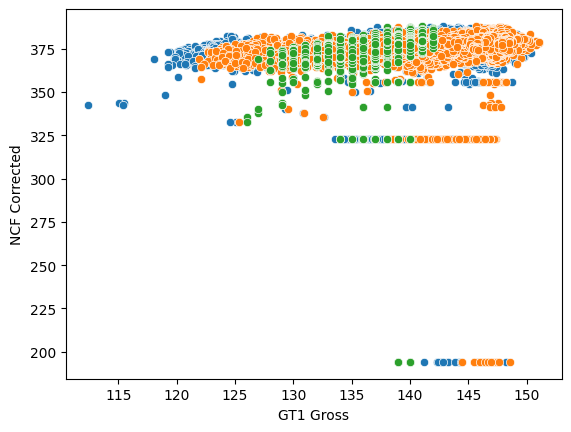

In [8]:
sns.scatterplot(data=plant,x='GT1 Gross',y='NCF Corrected')
sns.scatterplot(data=plant,x='GT2 Gross',y='NCF Corrected')
sns.scatterplot(data=plant,x='ST Gross',y='NCF Corrected')

In [9]:
# we need to drop the values for NCF corrected that are lower than 350 because the value was not true at that time due to loss communication with the server
ncf_index=plant[plant['NCF Corrected']<=350 ].index
ncf_index

Int64Index([ 1581,  1582,  1583,  1584,  1585,  1586,  1587,  1588,  1589,
             1590,
            ...
            13203, 13204, 13205, 13206, 13207, 13208, 13209, 13210, 13211,
            18405],
           dtype='int64', length=131)

In [10]:
#drop the values
plant.drop(index=ncf_index,inplace=True)

<AxesSubplot: xlabel='GT1 Gross', ylabel='NCF Corrected'>

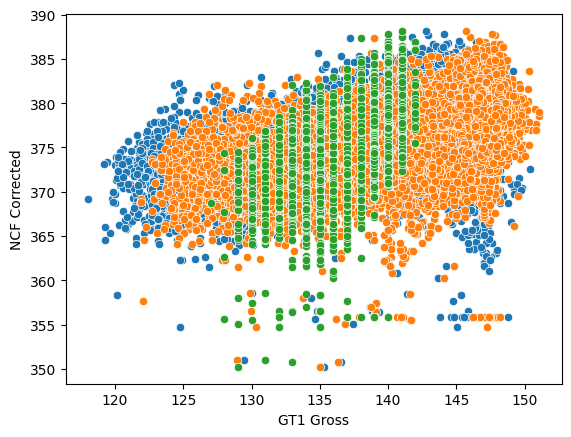

In [11]:
sns.scatterplot(data=plant,x='GT1 Gross',y='NCF Corrected')
sns.scatterplot(data=plant,x='GT2 Gross',y='NCF Corrected')
sns.scatterplot(data=plant,x='ST Gross',y='NCF Corrected')

<AxesSubplot: xlabel='GT1 Gross', ylabel='Count'>

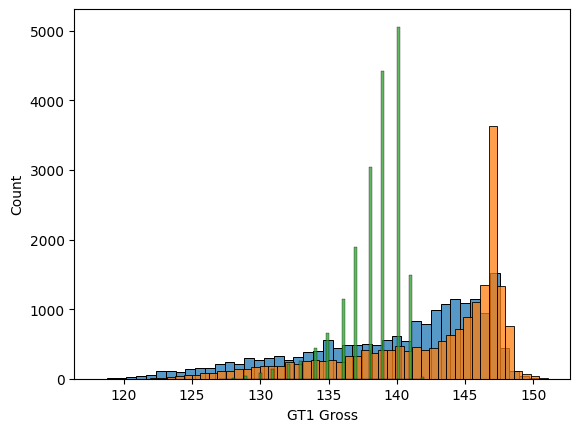

In [12]:
sns.histplot(data=plant,x='GT1 Gross')
sns.histplot(data=plant,x='GT2 Gross')
sns.histplot(data=plant,x='ST Gross')

<AxesSubplot: xlabel='GT1 Gross', ylabel='GT2 Gross'>

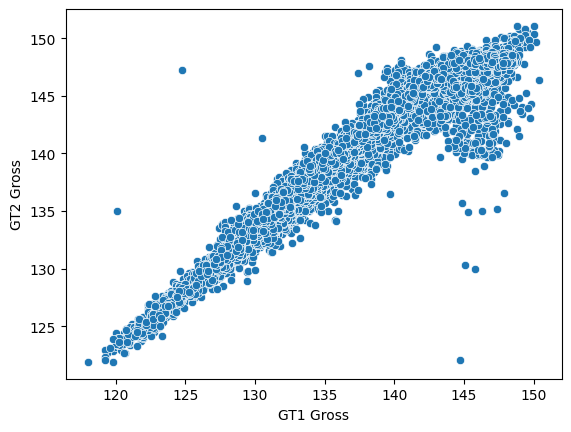

In [13]:
sns.scatterplot(data=plant,x='GT1 Gross',y='GT2 Gross')

In [14]:
#There are some outliers we need to remove them, base load means that both units have the same load or at least a small differences between them,
#we will take a difference for 5 MW and remove the others
#and finally create a column called similar load that have a boolean value if they are similar or not
gt2g=np.array(plant['GT2 Gross'])
gt1g=np.array(plant['GT1 Gross'])
gtg=np.isclose(gt1g,gt2g,atol=5)
plant.reset_index(inplace=True,drop=True)
plant['Similar load']=pd.DataFrame(data=gtg)
plant.head(5)

,Ambient Humidity,Ambient Temp,GT1 Gross,GT2 Gross,ST Gross,NCF Corrected,GT1 IGV,GT2 IGV,HRSG 1 HP Flow,HRSG 2 HP Flow,...,HRSG 2 LP Flow,ST Vaccum,Base load,GT1 Compressor inlet,GT2 Compressor inlet,GT1 Compressor Outlet,GT2 Compressor Outlet,GT1 TETC,GT2 TETC,Similar load
0,39.99,13.80,141.66,143.93,137.0,373.60,99.73,101.12,219.88,217.58,...,51.01,0.14,422.0,14.32,14.04,335.74,337.47,544.51,541.56,True
1,39.78,13.55,142.31,144.88,138.0,375.84,99.73,101.13,220.59,218.42,...,51.77,0.14,426.0,14.05,13.70,336.53,337.35,544.65,541.69,True
2,39.59,13.42,142.66,143.76,139.0,375.99,99.73,101.13,220.57,218.32,...,51.84,0.14,424.0,13.95,13.53,336.39,337.14,545.35,542.39,True
3,40.80,13.30,142.26,144.68,139.0,375.75,99.74,101.13,220.25,217.80,...,51.55,0.14,425.0,13.78,13.40,335.98,336.50,544.61,541.75,True
4,46.58,13.17,142.44,143.29,138.0,374.27,99.74,101.13,219.81,217.29,...,51.14,0.14,423.0,13.37,13.27,335.21,336.06,545.07,542.01,True


In [15]:
# we need the false values index to drop them
false_index=plant[(plant['Similar load'] == False)].index
false_index
plant.drop(index=false_index,inplace=True)
plant.reset_index(inplace=True,drop=True)


<AxesSubplot: xlabel='GT1 Gross', ylabel='GT2 Gross'>

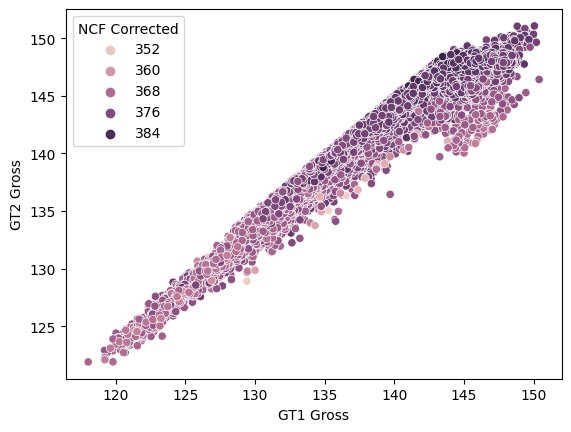

In [16]:
# Wee see now that the outliers are dropped and the graph is smooth
sns.scatterplot(data=plant,x='GT1 Gross',y='GT2 Gross',hue='NCF Corrected')

In [17]:
# now we calculate the correlation matrix to drop the less importance subsets from dataset
# calculate correlation matrix
corr_matrix = plant.corr()

# find highly correlated features
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)
print(high_corr)

{'GT2 Compressor inlet', 'HRSG 1 HP Flow', 'HRSG 1 LP Flow', 'GT1 Compressor inlet', 'GT1 Gross', 'ST Gross', 'GT2 Gross', 'GT1 Compressor Outlet', 'GT2 Compressor Outlet', 'HRSG 2 LP Flow', 'HRSG 2 HP Flow'}


<AxesSubplot: >

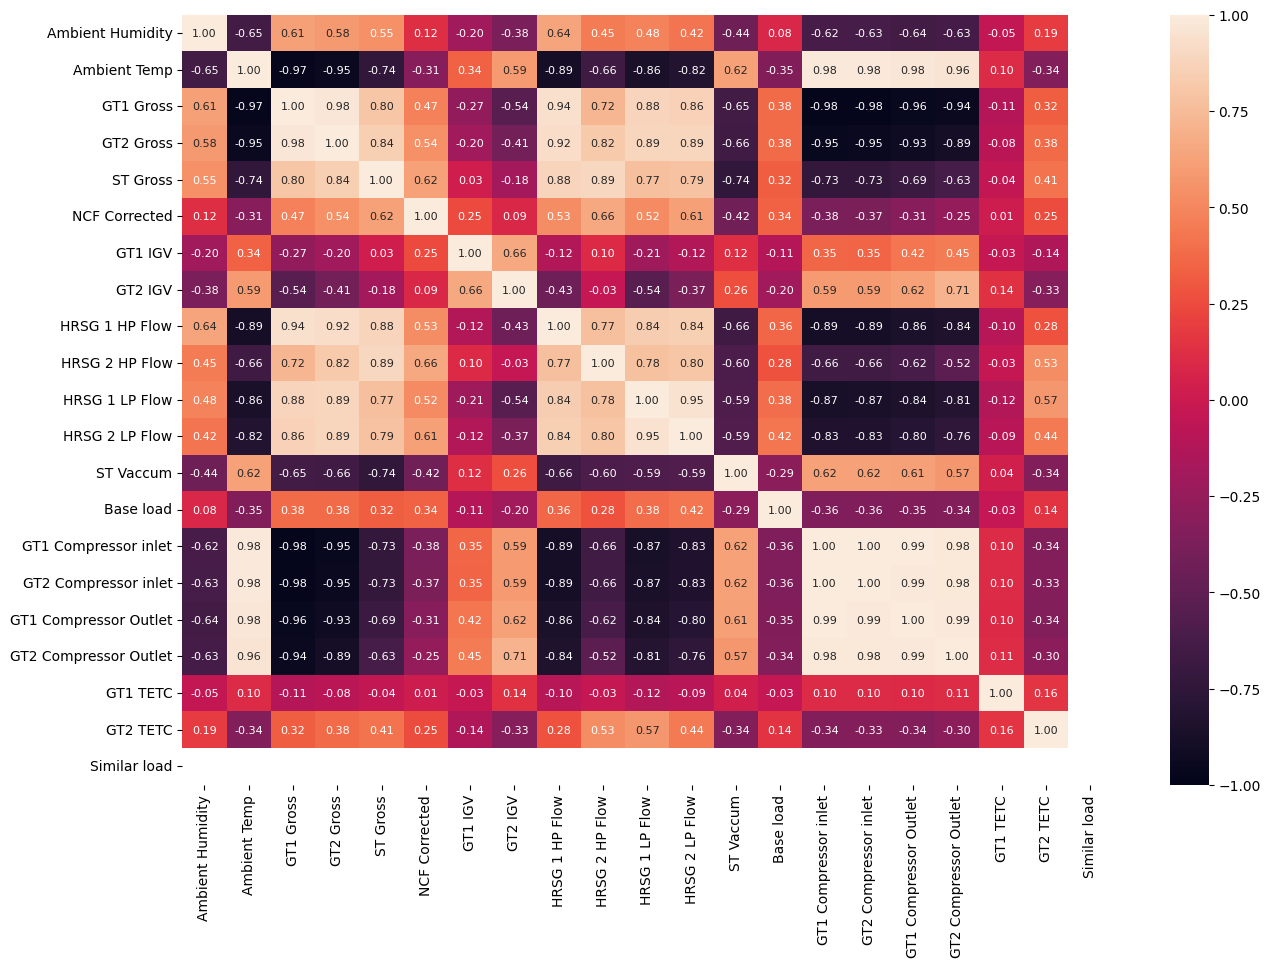

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(plant.corr(),vmax=1,vmin=-1,annot=True,annot_kws={"size": 8},fmt='0.2f')

In [19]:
#Define X and y variables
y=plant['NCF Corrected']
X= plant.drop(columns=['NCF Corrected','Base load','Similar load','GT1 TETC','GT2 TETC'])

In [20]:
#We need to normalize the X values using MinMax Scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.shape

(18406, 16)

In [21]:
#Create the Keras model
model = keras.Sequential()

In [22]:
#Add the input,hidden, and output layers with an activation method
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='relu'))

In [23]:
#Compile the model using adam optimizer
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [24]:
#create X and y train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=104)

In [25]:
#create a call back variable with patience = 10 tries
early_stop=EarlyStopping(patience=10)

In [26]:
#fit the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,callbacks=[early_stop],verbose=1,epochs=1000,workers=-1, use_multiprocessing=True)

Epoch 1/1000
403/403 [==============================] - 3s 4ms/step - loss: 117731.4141 - mae: 339.7740 - val_loss: 40709.6719 - val_mae: 201.6306
Epoch 2/1000
403/403 [==============================] - 2s 4ms/step - loss: 5018.7773 - mae: 45.3498 - val_loss: 311.5394 - val_mae: 12.7622
Epoch 3/1000
403/403 [==============================] - 1s 3ms/step - loss: 293.6044 - mae: 12.7901 - val_loss: 308.7483 - val_mae: 12.6516
Epoch 4/1000
403/403 [==============================] - 1s 3ms/step - loss: 290.4063 - mae: 12.6701 - val_loss: 303.7723 - val_mae: 12.5396
Epoch 5/1000
403/403 [==============================] - 1s 2ms/step - loss: 274.0536 - mae: 12.3421 - val_loss: 275.5344 - val_mae: 11.9876
Epoch 6/1000
403/403 [==============================] - 1s 2ms/step - loss: 247.0246 - mae: 11.7750 - val_loss: 249.2549 - val_mae: 11.3314
Epoch 7/1000
403/403 [==============================] - 1s 2ms/step - loss: 223.0165 - mae: 11.1833 - val_loss: 226.1843 - val_mae: 10.7933
Epoch 8/1000

In [27]:
#print the model keys history
print(model.history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


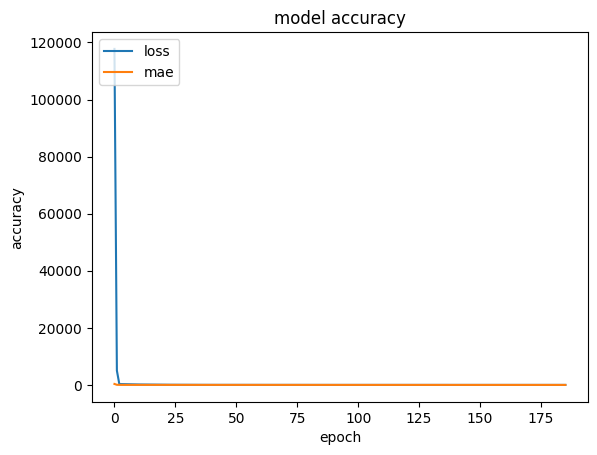

In [28]:
#plotting the metrics data
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'mae'], loc='upper left')
plt.show()

In [29]:
#Predict the X_test data 
ncf_pred_1=model.predict(X_test)
ncf_pred_1

173/173 [==============================] - 0s 1ms/step


array([[381.35794],
       [380.76874],
       [376.93048],
       ...,
       [379.31543],
       [378.17728],
       [373.9008 ]], dtype=float32)

In [30]:
#putting the y_test and predicted values into one dataframe
y_df=pd.DataFrame(data=y_test)
ncf_df=pd.DataFrame(data={'Predicted values': ncf_pred_1.flatten()})
final_df=pd.concat([y_df.set_index(ncf_df.index),ncf_df],axis=1)
final_df.head()

,NCF Corrected,Predicted values
0,381.64,381.357941
1,381.85,380.768738
2,375.80,376.930481
3,376.56,376.934998
4,379.42,378.932678


<AxesSubplot: >

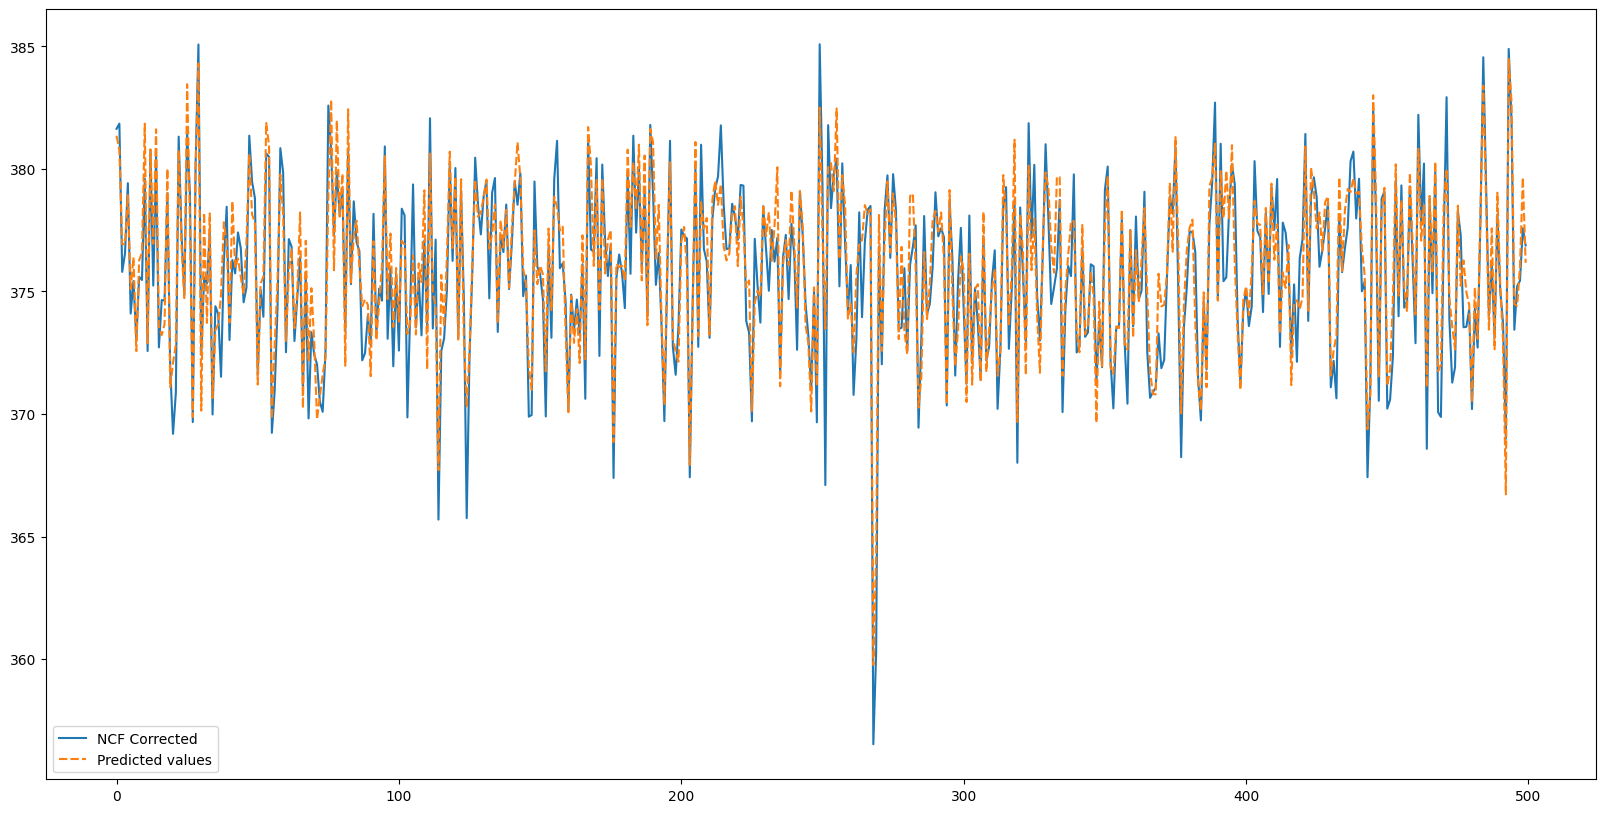

In [31]:
#plot a sample between test and pred 
plt.figure(figsize=(20,10))

sns.lineplot(data=final_df[:500])

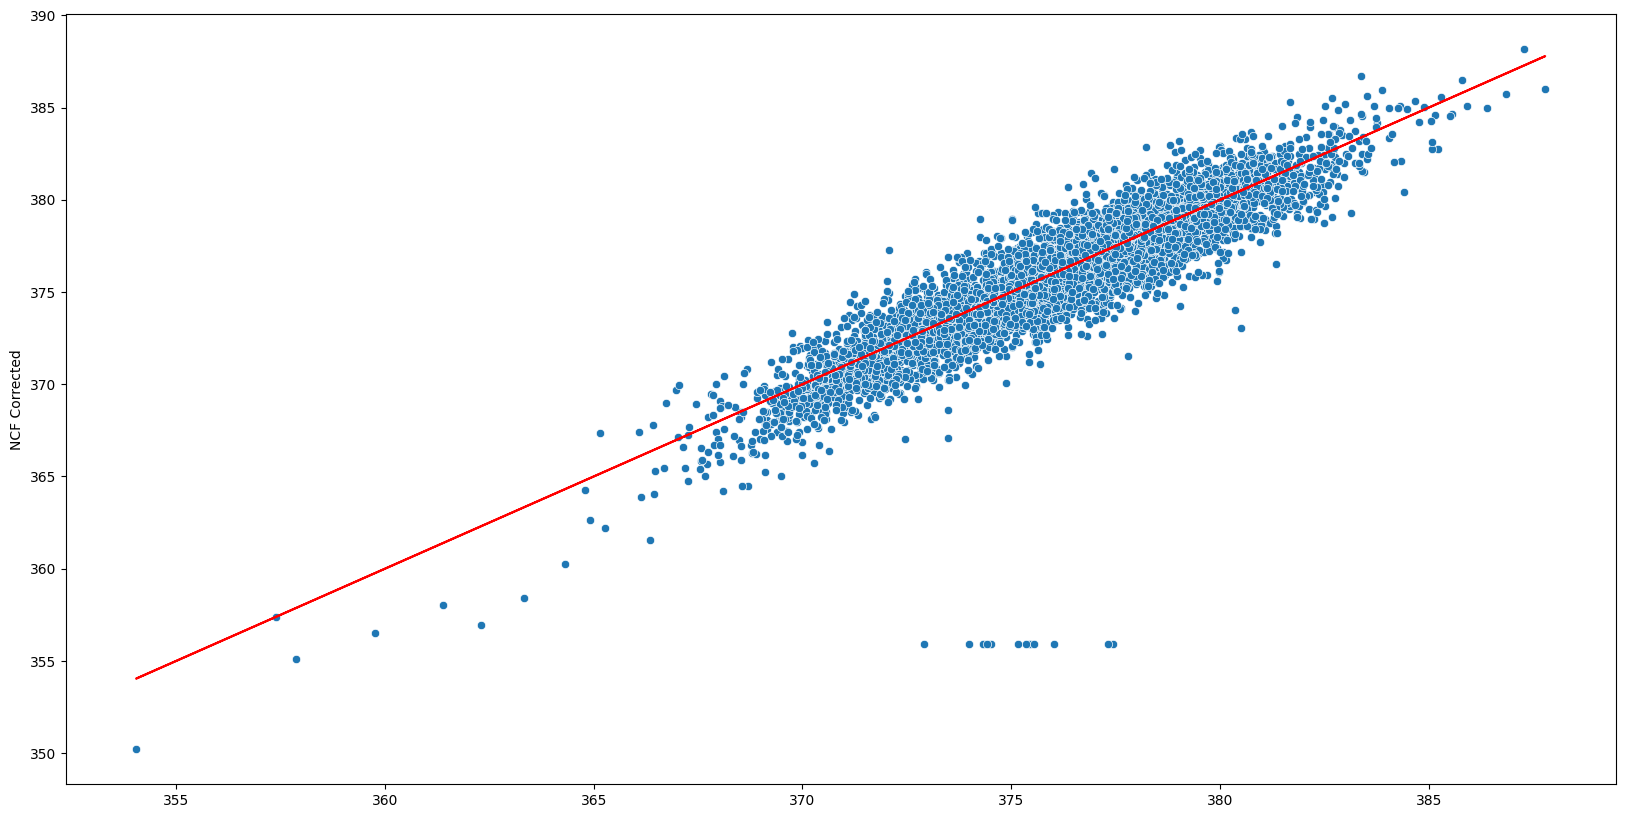

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=ncf_pred_1.flatten(),y=y_test)
plt.plot(ncf_pred_1,ncf_pred_1,color='r')

In [33]:
#Evaluate the model
mse=metrics.mean_squared_error(ncf_pred_1,y_test)
mse

2.7928157416558377

In [34]:
#import unseen dataset for prediction, The data was collected from the server and never seen by the model.
pred=pd.read_excel('Unseen_data.xlsx',sheet_name='Clean_data')
pred.head()
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ambient Humidity       2887 non-null   float64
 1   Ambient Temp           2887 non-null   float64
 2   GT1 Gross              2887 non-null   float64
 3   GT2 Gross              2887 non-null   float64
 4   ST Gross               2887 non-null   float64
 5   NCF Corrected          2887 non-null   float64
 6   GT1 IGV                2887 non-null   float64
 7   GT2 IGV                2887 non-null   float64
 8   HRSG 1 HP Flow         2887 non-null   float64
 9   HRSG 2 HP Flow         2887 non-null   float64
 10  HRSG 1 LP Flow         2887 non-null   float64
 11  HRSG 2 LP Flow         2887 non-null   float64
 12  HRSG 1 inlet flow      2887 non-null   float64
 13  HRSG 2 inlet flow      2887 non-null   float64
 14  HRSG 1 BFP flow        2887 non-null   float64
 15  HRSG

In [35]:
#Create X and Y variables
pred_y=pred[['NCF Corrected']]
pred_X=pred.drop(columns=['NCF Corrected','Base load','GT1 TETC','GT2 TETC','HRSG 1 inlet flow','HRSG 2 inlet flow','HRSG 1 BFP flow','HRSG 2 BFP flow'])
pred_y

,NCF Corrected
0,374.639709
1,374.979156
2,375.329712
3,375.204376
4,375.370819
...,...
2882,381.923065
2883,381.006012
2884,381.377808
2885,381.752258


In [36]:
#Normalize X value
scaled_x=scaler.fit_transform(pred_X)
scaled_x.shape

(2887, 16)

In [37]:
#Predict the X values
ncf_pred=model.predict(scaled_x)

91/91 [==============================] - 0s 875us/step


In [38]:
#Add the predicted values into dataframe
pred_y['Predicted value']=pd.DataFrame(ncf_pred)

C:\Users\Mohd Khaled\AppData\Local\Temp\ipykernel_2400\81406641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_y['Predicted value']=pd.DataFrame(ncf_pred)


In [39]:
#add new column with the difference between the predicted and actual values
pred_y['Difference']=abs(pred_y['NCF Corrected']-pred_y['Predicted value'])

C:\Users\Mohd Khaled\AppData\Local\Temp\ipykernel_2400\1166084513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_y['Difference']=abs(pred_y['NCF Corrected']-pred_y['Predicted value'])


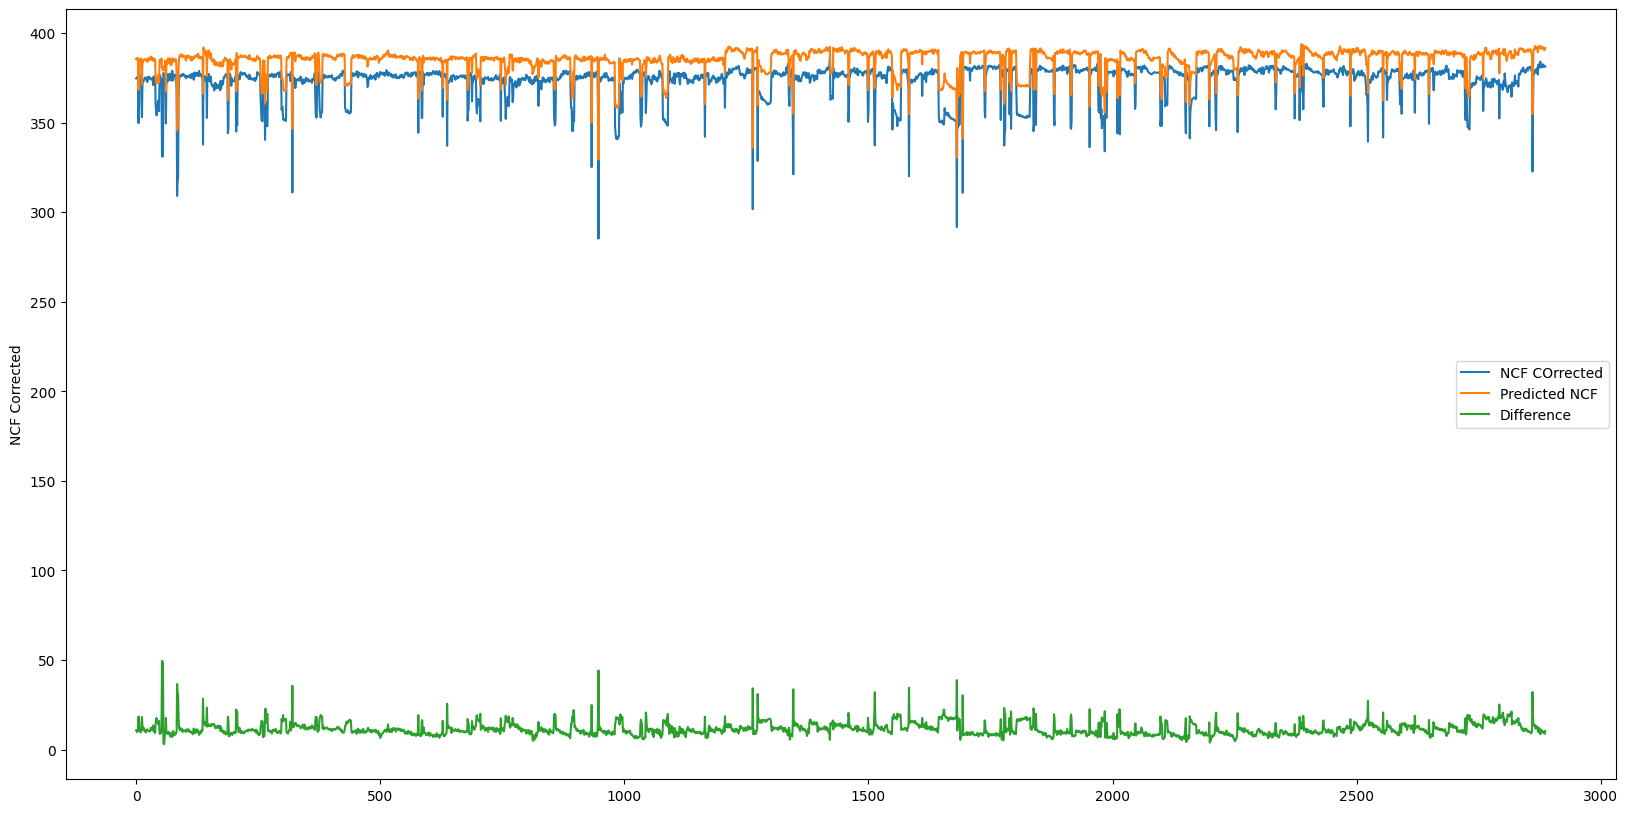

In [40]:
#Plot the predicted vs actual values and the difference
plt.figure(figsize=(20,10))
ax=plt.subplot()
sns.lineplot(data=pred_y,x=pred_y.index,y='NCF Corrected',label='NCF COrrected')
sns.lineplot(data=pred_y,x=pred_y.index,y='Predicted value',label='Predicted NCF')
ax = sns.lineplot(data=pred_y,x=pred_y.index,y='Difference',label='Difference')

In [41]:
#Use bias correction method to reduce the gap between the predicted and actual values by taking the mean value of the difference and subtract the predicted values 
pred_y['Predicted value']=pred_y['Predicted value']-pred_y['Difference'].mean()


C:\Users\Mohd Khaled\AppData\Local\Temp\ipykernel_2400\3589153649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_y['Predicted value']=pred_y['Predicted value']-pred_y['Difference'].mean()


<AxesSubplot: ylabel='NCF Corrected'>

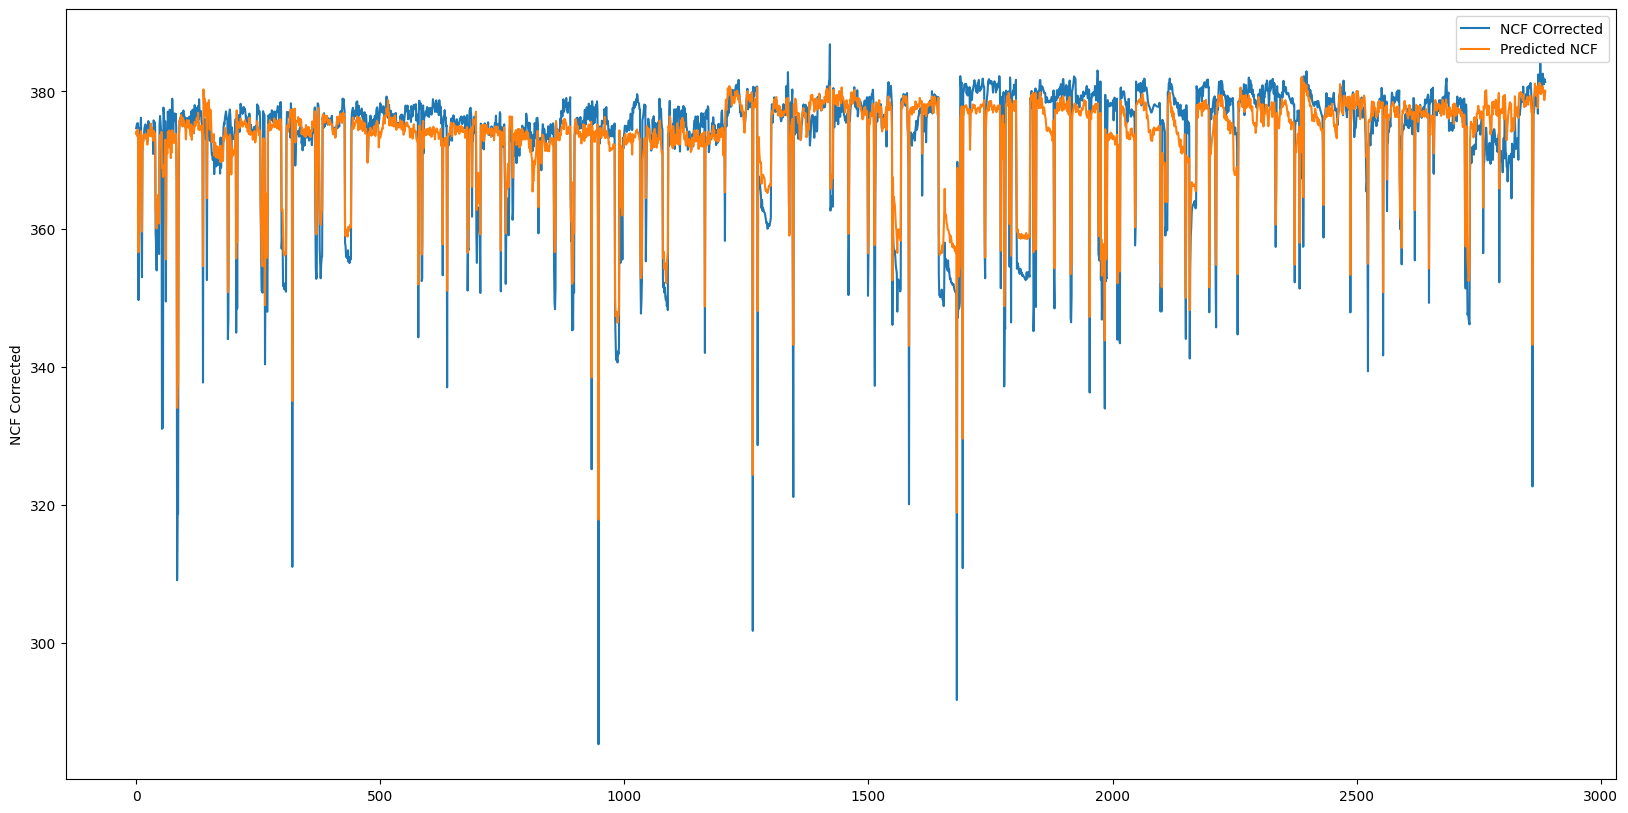

In [42]:
#plot the predicted vs actual after using bias correction method
plt.figure(figsize=(20,10))
ax=plt.subplot()
sns.lineplot(data=pred_y,x=pred_y.index,y='NCF Corrected',label='NCF COrrected')
sns.lineplot(data=pred_y,x=pred_y.index,y='Predicted value',label='Predicted NCF')


In [43]:
#Save the model
model.save('Base_load.h5')

In [44]:
model.evaluate(X_test,y_test,batch_size=100)

56/56 [==============================] - 0s 1ms/step - loss: 2.7928 - mae: 1.1563


[2.792815923690796, 1.156314492225647]

In [45]:
print(ncf_pred_1.shape[0])
print(y_test.shape[0])
print(pd.DataFrame(ncf_pred_1).index)
print(y_test.index)

5522
5522
RangeIndex(start=0, stop=5522, step=1)
Int64Index([10313, 17477,  4403,  7119, 17142, 11529, 18383, 14977, 11526,
             3928,
            ...
              797,  4966, 11041, 12883, 18009, 12465,  9118, 16646,   443,
             7087],
           dtype='int64', length=5522)
